In [1]:
from skimage.color import rgb2gray    # rgb to gray scale conversion
import numpy as np
import cv2                            # Read write show image
import matplotlib.pyplot as plt
from scipy import ndimage             # Multi dimensional image processing
from PIL import Image
import copy
from skimage.filters import threshold_multiotsu
import glob


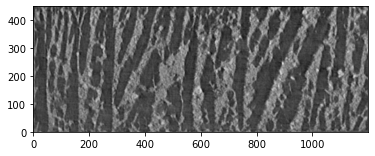

In [3]:
# Actual image 
images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = "lower",cmap = "gray")

image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = "lower",cmap ='gray')

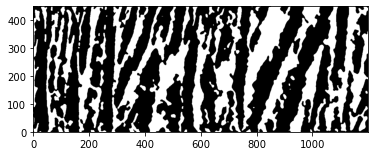

In [4]:
# Median filter
median = cv2.medianBlur(image_3d, 9)
plt.imshow(median,origin = "lower",cmap = "gray")


#OTSU
ret2,otsu = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,origin = "lower",cmap = 'gray')


# Binary flood fill
img_fill_holes=ndimage.binary_fill_holes(otsu).astype(int)
plt.imshow(img_fill_holes,origin = "lower",cmap = 'gray')


In [7]:
# Pipeline 
"""
Check folder or directory if it gives error
"""

def thresholding_pipeline(image):
    image_3d = copy.deepcopy(images_3d)                     
    image_3d = (image_3d/256).astype('uint8')
    image_3d = image_3d[300:750,400:1600]
    median = cv2.medianBlur(image_3d, 9)
    ret2,otsu = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_fill_holes=ndimage.binary_fill_holes(otsu).astype(int)
    plt.imsave(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\Threshold_XRM\binary_'+image, img_fill_holes, cmap=plt.cm.gray)
    #imageio.imwrite('Image_'+image, np_img)

for i in sorted(glob.glob(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_*.tiff')):
    thresholding_pipeline(i)

OSError: [Errno 22] Invalid argument: 'C:\\Users\\nikhi\\Desktop\\MSE\\Data\\Li-ion_battery_porous_electrode-20200420T163505Z-001\\Threshold_XRM\\binary_C:\\Users\\nikhi\\Desktop\\MSE\\Data\\Li-ion_battery_porous_electrode-20200420T163505Z-001\\XRM\\CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff'

# Edge detection

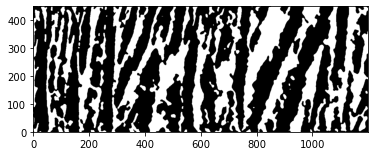

In [2]:

#<-------------------------------------------------------------------------------------------------------->
# Edge detection

img = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\binary_CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff',-1)
img = copy.deepcopy(img)                      # To get permission for changes with image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,origin = "lower",cmap = "gray")

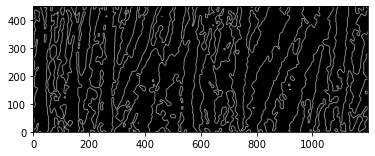

In [6]:
# Sobel python
h, w = img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * img[i - 1, j]) + \
                         (horizontal[0, 2] * img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * img[i, j - 1]) + \
                         (horizontal[1, 1] * img[i, j]) + \
                         (horizontal[1, 2] * img[i, j + 1]) + \
                         (horizontal[2, 0] * img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * img[i + 1, j]) + \
                         (horizontal[2, 2] * img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * img[i - 1, j - 1]) + \
                       (vertical[0, 1] * img[i - 1, j]) + \
                       (vertical[0, 2] * img[i - 1, j + 1]) + \
                       (vertical[1, 0] * img[i, j - 1]) + \
                       (vertical[1, 1] * img[i, j]) + \
                       (vertical[1, 2] * img[i, j + 1]) + \
                       (vertical[2, 0] * img[i + 1, j - 1]) + \
                       (vertical[2, 1] * img[i + 1, j]) + \
                       (vertical[2, 2] * img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.imshow(newgradientImage,origin = 'lower', cmap='gray')
plt.show()



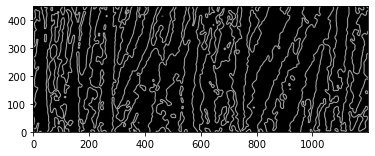

In [11]:
# Sobel
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
edges_sobel = np.hypot(sobel_x, sobel_y)
edges_sobel *= 255.0 / np.max(edges_sobel)
plt.imshow(edges_sobel,origin  ="lower",cmap = 'gray')

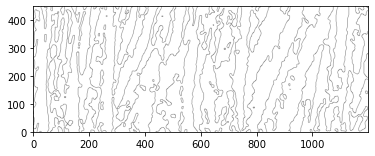

In [5]:
# Canny - threshold parameters
edges_canny = cv2.Canny(img, 100, 100)
plt.imshow(edges_canny,origin = 'lower',cmap = 'gray')

imagem = cv2.bitwise_not(edges_canny)
plt.imshow(imagem,origin = "lower",cmap = 'gray')

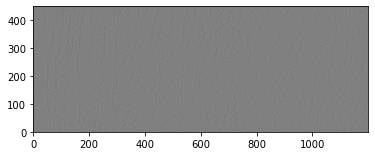

In [7]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian,origin = "lower",cmap = 'gray')

imagem = cv2.bitwise_not(laplacian)
plt.imshow(imagem,origin = "lower",cmap = 'gray')

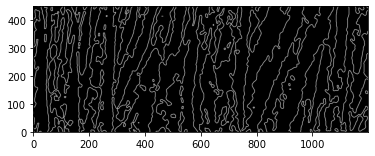

In [10]:
schar_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
schar_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
edges_scharr = np.hypot(schar_x, schar_y)
edges_scharr *= 255.0 / np.max(edges_scharr)
plt.imshow(edges_scharr,origin  ="lower",cmap = 'gray')

imagem = cv2.bitwise_not(edges_scharr)
plt.imshow(imagem,origin = "lower",cmap = 'gray')

